# Faculty Notebook Day3

In [1]:
import numpy       as np
import pandas      as pd
import scipy.stats as stats

## Analysis of variance (ANOVA)

ANOVA is a hypothesis testing technique tests the equality of two or more population means by examining the variances of samples that are taken.

ANOVA tests the general rather than specific differences among means. 

### Assumptions of ANOVA

* 1) All populations involved follow a normal distribution
* 2) All populations have the same variance
* 3) The samples are randomly selected and independent of one another


## One-way ANOVA

### Example 1

Consider the monthly income of members from three different gyms - fitness centers given below:
* Gym 1 (n = 22): [60, 66, 65, 55, 62, 70, 51, 72, 58, 61, 71, 41, 70, 57, 55, 63, 64, 76, 74, 54, 58, 73]
* Gym 2 (n = 18): [56, 65, 65, 63, 57, 47, 72, 56, 52, 75, 66, 62, 68, 75, 60, 73, 63, 64]
* Gym 3 (n = 23): [67, 56, 65, 61, 63, 59, 42, 53, 63, 65, 60, 57, 62, 70, 73, 63, 55, 52, 58, 68, 70, 72, 45]  
Using ANOVA, test whether the mean monthly income is equal for each Gym.


In [2]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [3]:
Gym_1 = np.array([60, 66, 65, 55, 62, 70, 51, 72, 58, 61, 71, 41, 70, 57, 55, 63, 64, 76, 74, 54, 58, 73])
Gym_2 = np.array([56, 65, 65, 63, 57, 47, 72, 56, 52, 75, 66, 62, 68, 75, 60, 73, 63, 64])
Gym_3 = np.array([67, 56, 65, 61, 63, 59, 42, 53, 63, 65, 60, 57, 62, 70, 73, 63, 55, 52, 58, 68, 70, 72, 45])  

print('Count, Mean and standard deviation of monthly income of members of Gym 1: %3d, %3.2f and %3.2f' % (len(Gym_1), Gym_1.mean(),np.std(Gym_1,ddof =1)))
print('Count, Mean and standard deviation of monthly income of members of Gym 2: %3d, %3.2f and %3.2f' % (len(Gym_2), Gym_2.mean(),np.std(Gym_2,ddof =1)))
print('Count, Mean and standard deviation of monthly income of members of Gym 3: %3d, %3.2f and %3.2f' % (len(Gym_3), Gym_3.mean(),np.std(Gym_3,ddof =1)))

Count, Mean and standard deviation of monthly income of members of Gym 1:  22, 62.55 and 8.67
Count, Mean and standard deviation of monthly income of members of Gym 2:  18, 63.28 and 7.79
Count, Mean and standard deviation of monthly income of members of Gym 3:  23, 60.83 and 8.00


In [4]:
monthly_inc_df = pd.DataFrame()

df1            = pd.DataFrame({'Gym': '1', 'Monthly_inc':Gym_1})
df2            = pd.DataFrame({'Gym': '2', 'Monthly_inc':Gym_2})
df3            = pd.DataFrame({'Gym': '3', 'Monthly_inc':Gym_3})

monthly_inc_df = monthly_inc_df.append(df1) 
monthly_inc_df = monthly_inc_df.append(df2) 
monthly_inc_df = monthly_inc_df.append(df3) 

### Let us explore the data graphically

### A side by side boxplot is one of the best way to compare group locations, spreads and shapes.

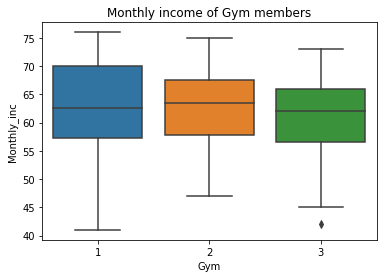

In [4]:
sns.boxplot(x = "Gym", y = "Monthly_inc", data = monthly_inc_df)
plt.title('Monthly income of Gym members')
plt.show()

#### The boxplots show almost similar shapes, location and spreads and group 3 has an low outlier.

### Step 1: State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

### Step 2: Decide the significance level

Here we select $\alpha$ = 0.05 

### Step 3: Identify the test statistic

Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

### Step 4: Calculate F, a test statistic

* scipy.stats.f.ppf gives the critical value at a given level of confidence with a pair of degrees of freedom.
* scipy.stats.f.cdf gives the cumulative distribution function for the given random variable - given the calculated F value at a given level of confidence with a pair of degrees of freedom. 

In [12]:
import scipy.stats             as     stats

In [13]:
crit = stats.f.ppf(q = 1-0.05, dfn = 2, dfd = 60)
print('F critical value for 2 and 60 df with .95 confidence %3.2f' %crit)

F critical value for 2 and 60 df with .95 confidence 3.15


### or Calculate p value

In [14]:
p_value = 1 -stats.f.cdf(0.497075, dfn = 2, dfd = 60)
print('P value for 2 and 60 df with .95 confidence for the calculated F value %3.5f' % p_value)

P value for 2 and 60 df with .95 confidence for the calculated F value 0.61079


### Or formulate an ANOVA table using statsmodels

* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In the formula. we know that 
* 1)  ~ separates the left hand side of the model from the right hand side
* 2) + adds new columns to the design matrix
* 3) :  adds a new column to the design matrix with the product of the other two columns
* 4) * also adds the individual columns multiplied together along with their product
* 5) C() operator denotes that the variable enclosed in C() will be treated explicitly as categorical variable.

In [15]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Monthly_inc ~ Gym', data = monthly_inc_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

               sum_sq    df         F   PR(>F)
Gym         66.614123   2.0  0.497075  0.61079
Residual  4020.370004  60.0       NaN      NaN


### Step 5:  Decide to reject or accept null hypothesis

In this example, calculated value of F ( = 0.497075) is less than Critical value of F( = 3.15)

So the statistical decision is to reject the null hypothesis at 5% level of significance.

### So there is  sufficient evidence  to reject the null hypothesis that at least one mean monthly income of a gym is different from others .

# Two-way ANOVA

The following table shows the quantity of soaps at different discount at locations collected over 20 days.

In [17]:
table1  = [['Loc','Dis0','Dis10','Dis20'], [ 1, 20, 28, 32], [ 2, 20, 19, 20],
  [ 1, 16, 23, 29 ],[ 2, 21, 27, 31 ],[ 1, 24, 25, 28 ],[ 2, 23, 23, 35 ],
  [ 1, 20, 31, 27 ],[ 2, 19, 30, 25 ],[ 1, 19, 25, 30 ],[ 2, 25, 25, 31 ],
  [ 1, 10, 24, 26 ],[ 2, 22, 21, 31 ],[ 1, 24, 28, 37 ],[ 2, 25, 33, 31 ],
  [ 1, 16, 23, 33 ],[ 2, 21, 26, 23 ],[ 1, 25, 26, 27 ],[ 2, 26, 22, 22 ],
  [ 1, 16, 25, 31 ],[ 2, 22, 28, 32 ],[ 1, 18, 22, 37 ],[ 2, 25, 24, 22 ],
  [ 1, 20, 24, 28 ],[ 2, 23, 23, 29 ],[ 1, 17, 26, 25 ],[ 2, 23, 26, 25 ],
  [ 1, 26, 28, 23 ],[ 2, 24, 16, 34 ],[ 1, 16, 21, 26 ],[ 2, 20, 30, 30 ],
  [ 1, 21, 27, 33 ],[2, 23, 22, 25 ],[ 1, 24, 25, 28 ],[ 2, 18, 16, 39 ],
  [ 1, 19, 20, 30 ],[ 2, 19, 25, 32 ],[ 1, 19, 26, 30 ],[ 2, 19, 34, 29 ],
  [ 1, 21, 26, 26 ],[ 2, 30, 23, 22 ]]
headers = table1.pop(0) #

df1 = pd.DataFrame(table1, columns=headers)
print(df1)

    Loc  Dis0  Dis10  Dis20
0     1    20     28     32
1     2    20     19     20
2     1    16     23     29
3     2    21     27     31
4     1    24     25     28
5     2    23     23     35
6     1    20     31     27
7     2    19     30     25
8     1    19     25     30
9     2    25     25     31
10    1    10     24     26
11    2    22     21     31
12    1    24     28     37
13    2    25     33     31
14    1    16     23     33
15    2    21     26     23
16    1    25     26     27
17    2    26     22     22
18    1    16     25     31
19    2    22     28     32
20    1    18     22     37
21    2    25     24     22
22    1    20     24     28
23    2    23     23     29
24    1    17     26     25
25    2    23     26     25
26    1    26     28     23
27    2    24     16     34
28    1    16     21     26
29    2    20     30     30
30    1    21     27     33
31    2    23     22     25
32    1    24     25     28
33    2    18     16     39
34    1    19     20

This is a two-way ANOVA with replication since the data contains values for multiple locations.

Conduct a two-way ANOVA at $\alpha$ = 5% to test the effects of discounts and location on sales.

In [18]:
d0_val  = df1['Dis0'].values
d10_val = df1['Dis10'].values
d20_val = df1['Dis20'].values
l_val   = df1['Loc'].values

df1   = pd.DataFrame({'Loc': l_val, 'Discount':'0','Qty': d0_val})
df2   = pd.DataFrame({'Loc': l_val, 'Discount':'10','Qty': d10_val})
df3   = pd.DataFrame({'Loc': l_val, 'Discount':'20','Qty': d20_val})

Sale_qty_df = pd.DataFrame()

Sale_qty_df = Sale_qty_df.append(df1) 
Sale_qty_df = Sale_qty_df.append(df2) 
Sale_qty_df = Sale_qty_df.append(df3) 

pd.DataFrame(Sale_qty_df)

,Loc,Discount,Qty
0,1,0,20
1,2,0,20
2,1,0,16
3,2,0,21
4,1,0,24
5,2,0,23
6,1,0,20
7,2,0,19
8,1,0,19
9,2,0,25


### Step 1: State the null and alternative hypothesis:

The null hypotheses for each of the sets are given below. 

* 1) The population means of the first factor (Discount) are equal. 
* 2) The population means of the second factor (Location) are equal. 
* 3) There is no interaction between the two factors - Discount and Location.

Alternative Hypothesis:

* 1) The population means of the first factor (Discount) are not equal. 
* 2) The population means of the second factor (Location) are not equal. 
* 3) There is an interaction between the two factors - Discount and Location.

### Step 2: Decide the significance level

Here we select α = 0.05

### Step 3: Identify the test statistic

##### Here we have three groups and two factors. There are two independent variables, Discount and Location. 

##### Two-way ANOVA determines how a response (Sale Quantity) is affected by two factors, Discount and Location. 

### Step 4: Calculate p value using ANOVA table

* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In [19]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

formula = 'Qty ~ C(Discount) + C(Loc) + C(Discount):C(Loc)'
model = ols(formula, Sale_qty_df).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

                         sum_sq     df          F        PR(>F)
C(Discount)         1240.316667    2.0  39.279968  1.055160e-13
C(Loc)                 7.008333    1.0   0.443898  5.065930e-01
C(Discount):C(Loc)    84.816667    2.0   2.686085  7.246036e-02
Residual            1799.850000  114.0        NaN           NaN


### Step 5:  Decide to reject or accept null hypothesis

In this example, 
* p value for discount  is 1.06e-13 and < 0.05 so we reject the null hypothesis (1) and conclude that the discount rate is having an effect on sales quantity.
* p value for location  is 0.5066 and > 0.05 so we retain the null hypothesis (2) and conclude that the location is not having an effect on sales quantity.
* p value for interaction (discount:location)  is 0.0725 and > 0.05 so we retain the null hypothesis (3) and conclude that the interaction (discount:location) is not having an effect on sales quantity.

# Chi Square

A chi-square distribution with k degrees of freedom is given by sum of squares of standard normal random variables $Z_1$, $Z_2$, ... $Z_k$ obtained by transforming normal standard variables $X_1$, $X_2$, ... $X_k$ with mean values $\mu_1$, $\mu_2$, ... $\mu_k$ and corresponding standard deviation $\sigma_1$, $\sigma_2$, ... $\sigma_k$

${\chi_k}^2$ = ${Z_1}^2$ + ${Z_2}^2$ + … + ${Z_k}^2$ 


The probability density function of f(x) = 

$\frac{x^{\frac{k}{2}-1}e^\frac{-x}{2}}{2^{\frac{k}{2}} \Gamma {\bigg(\frac{k}{2}\bigg)}}$ if x > 0 else 0

where Γ(k/2) is a gamma function given by


$\Gamma\frac{k}{2}$ = ${\int_0}^\infty x^{k-1} e^{-x} dx$

### Properties of Chi Square distribution

##### 1. The mean and standard deviation of a chi-square distribution are k and √2k respectively, where k is the degrees of freedom.
##### 2. As the degrees of freedom increases, the probability density function of a chi-square distribution approaches normal distribution.
##### 3. Chi-square goodness of fit is one of the popular tests for checking whether a data follows a specific probability distribution.
##### 4. Chi square test is a right tailed test.

### Chi-square Goodness of fit tests

Goodness of fit tests are hypothesis tests that are used for comparing the observed distribution pf data with expected distribution of the data to decide whether there is any statistically significant difference between the observed distribution and a theoretical distribution (for example, normal, exponential, etc.) based on the comparison of observed frequencies in the data and the expected frequencies if the data follows a specified theoretical distribution.

| Hypothesis | Description                                                           |
| ----------- | -------------------------------------------------------------------- |
| Null hypothesis | There is no statistically significant difference between the observed frequencies and the expected frequencies from a hypothesized distribution |
| Alternative hypothesis | There is statistically significant difference between the observed frequencies and the expected frequencies from a hypothesized distribution |


### Chi-square Goodness of fit tests

Chi-square statistic for goodness of fit is given by 

$\chi^2$ = $\sum_{i=1}^{n}\sum_{j=1}^{m}\frac{({O_{ij}-E_{ij}})^2}{E_{ij}}$

This test is invalid when the observed or expected frequencies in each category are too small. A typical rule is that all of the observed and expected frequencies should be at least 5.

### Step 5: Decide to reject or accept null hypothesis

###### In this example, p value is 0.0000449 and < 0.05 so we reject the null hypothesis. 
###### So, we conclude that Meal preference is not defined in the null hypothesis.

### Chi-square tests of independence

Chi-square test of independence is a hypothesis test in which we test whether two or more groups are statistically independent or not.

| Hypothesis | Description |
| --------------------- | ----------------------- |
| Null Hypothesis | Two or more groups are independent |
| Alternative Hypothesis | Two or more groups are dependent |

$\chi^2$ = $\sum_{i=1}^{n}\sum_{j=1}^{m}\frac{({O_{ij}-E_{ij}})^2}{E_{ij}}$

The corresponding degrees of freedom is (r - 1) * ( c  - 1) , where r is the number of rows and c is the number of columns in the contingency table. 

scipy.stats.chi2_contingency is the Chi-square test of independence of variables in a contingency table.

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table observed. The expected frequencies are computed based on the marginal sums under the assumption of independence.

### Example:

The table below contains the number of perfect, satisfactory and defective products are manufactured by both male and female.

| Gender  | Perfect | Satisfactory | Defective |
| ------- | ---- | --------- | -------- |
| Male    | 138 | 83 | 64 |
| Female  | 64 | 67 | 84 |


Do these data provide sufficient evidence at the 5% significance level to infer that there are differences in quality among genders (Male and Female)?

### Step 1: State the null and alternative hypothesis:

Null hypothesis: $H_0$: There is no difference in quality of the products manufactured by male and female
                        
Alternative hypothesis: $H_A$: There is a significant difference in quality of the products manufactured by male and female

### Step 2: Decide the significance level

Here we select α = 0.05

### Step 3: Identify the test statistic

We use the chi-square test of independence to find out the difference of categorical variables 

### Step 4: Calculate p value or chi-square statistic value

In [20]:
import pandas      as pd
import numpy       as np
import scipy.stats as stats

quality_array = np.array([[138, 83, 64],[64, 67, 84]])
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(quality_array)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 22.15247 P value 0.000015 Degrees of freedom 2


### Step 5: Decide to reject or accept null hypothesis

###### In this example, p value is 0.000015 and < 0.05 so we reject the null hypothesis. 
###### So, we conclude that there is a significant difference in quality of the products manufactured by male and female.

## Chi-Square - One factor

###  Example 2

A1 airlines operated daily flights to several Indian cities. The operations manager believes that 30% of their passengers prefer vegan food, 45% prefer vegetarian food , 20% prefer non-veg food 5% request for Jain food. 

A sample of 500 passengers was chosen to analyse the food preferences and the data is shown in the following table:

|               | Food type | Vegan | Vegetarian | Non-Vegetarian | Jain |
| ------------------------- | ---- | ---- | ----- | ---- | ---- |
|Number of passengers |  | 190 | 185 | 90 | 35 |

At 5% level of significance, can you confirm that the meal preference is as per the belief of the operations manager?

### Step 1: State the null and alternative hypothesis:

Null hypothesis: $H_0$: Meal preference is as per the perceived ratios of the operations manager
                        
Alternative hypothesis: $H_A$: Meal preference is different from the perceived ratios of the operations manager

### Step 2: Decide the significance level

Here we select α = 0.05

### Step 3: Identify the test statistic

Since we have observed frequencies of meal preference and we can calculate the expected frequencies, we can use chi-square goodness of fit for this problem.

### Step 4: Calculate p value or chi-square statistic value

Use the scipy.stats.chisquare function to compute Chi square goodness of fit by giving the observed values and expected values as input.

The first value in the returned tuple is the χ2 value itself, while the second value is the p-value computed using 
ν = k−1 where k is the number of values in each array.

We can calculate the expected frquency as follows:
1. Compute the total number of passengers. It will be 500.
2. We expect 30% of them prefer Vegan food, so the expected frequency for Vegan Food is = 0.3 * 500 = 150
3. Similarly we can calculate the expected frequencies of the rest of them.

In [1]:
import scipy.stats as stats
import scipy

observed_values    = scipy.array([190, 185, 90, 35])
n                  = observed_values.sum()

expected_values    = scipy.array([n*0.3, n*.45, n*0.2, n*0.05])

chi_square_stat, p_value = stats.chisquare(observed_values, f_exp=expected_values)

print('At 5 %s level of significance, the p-value is %1.7f' %('%', p_value))

print('At 5 %s level of significance, the chi observed is %1.7f' %('%', chi_square_stat))

## chi critical at 95% is 8.907


At 5 % level of significance, the p-value is 0.0000449
At 5 % level of significance, the chi observed is 22.7777778


### Step 5: Decide to reject or accept null hypothesis

### In this example, p value is 0.0000449 and < 0.05 so we reject the null hypothesis. 
### So, we conclude that Meal preference is not defined in the null hypothesis.

Refer to the above example 2. Here the operations manager changes his belief and now believes that 28% of their passengers prefer vegan food, 42% prefer vegetarian food , 25% prefer non-veg food 5% request for Jain food. 

At 5% level of significance, can you confirm that the meal preference is as per the belief of the operations manager?

### Chi-square tests of independence

Chi-square test of independence is a hypothesis test in which we test whether two or more groups are statistically independent or not.

| Hypothesis | Description |
| --------------------- | ----------------------- |
| Null Hypothesis | Two or more groups are independent |
| Alternative Hypothesis | Two or more groups are dependent |

$\chi^2$ = $\sum_{i=1}^{n}\sum_{j=1}^{m}\frac{({O_{ij}-E_{ij}})^2}{E_{ij}}$

The corresponding degrees of freedom is (r - 1) * ( c  - 1) , where r is the number of rows and c is the number of columns in the contingency table. 

scipy.stats.chi2_contingency is the Chi-square test of independence of variables in a contingency table.

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table observed. The expected frequencies are computed based on the marginal sums under the assumption of independence.

## Chisquare - Two factor

### Example 3 

The table below contains the number of perfect, satisfactory and defective products are manufactured by both male and female.

| Gender  | Perfect | Satisfactory | Defective |
| ------- | ---- | --------- | -------- |
| Male    | 138 | 83 | 64 |
| Female  | 64 | 67 | 84 |


Do these data provide sufficient evidence at the 5% significance level to infer that there are differences in quality among genders (Male and Female)?

### Step 1: State the null and alternative hypothesis:

Null hypothesis: $H_0$: There is no difference in quality of the products manufactured by male and female
                        
Alternative hypothesis: $H_A$: There is a significant difference in quality of the products manufactured by male and female

### Step 2: Decide the significance level

Here we select α = 0.05

### Step 3: Identify the test statistic

We use the chi-square test of independence to find out the difference of categorical variables 

### Step 4: Calculate p value or chi-square statistic value

In [2]:
import pandas      as pd
import numpy       as np
import scipy.stats as stats

quality_array = np.array([[138, 83, 64],[64, 67, 84]])
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(quality_array)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 22.15247 P value 0.000015 Degrees of freedom 2


### Step 5: Decide to reject or accept null hypothesis

### In this example, p value is 0.000015 and < 0.05 so we reject the null hypothesis. 
### So, we conclude that there is a significant difference in quality of the products manufactured by male and female.

## End